# Statistics

Each experiment has been run for 50 times and the related data cointaining number of states, path lengths and execution times are collected in the correspondent ```solution_<environment>_<planner>.log``` files.

We will create "*aggregative runs*" statistics with comparison between planners for each environment and "*single runs*" statistics with the **jackknifing risk** metric we have introduced (only for the environments with consistent backward maneuvers).



In [70]:
import matplotlib.pyplot as plt
import math
import numpy as np
from tqdm import tqdm

def collect_log(input_path):
    with open(input_path,'r') as f:
        lines = f.readlines()

        num_states_approx = []
        num_states_exact = []
        lengths_approx = []
        lengths_exact = []
        times = []
        
        for row in tqdm(lines[-51:-1]):
            approx_sol, _, _, n_states, _, _, _, length, _, _, _, time, _ = list(map(float, row.split('; ')[:-1]))
            if approx_sol == 1.0:
                num_states_approx.append(int(n_states))
                lengths_approx.append(length)
            else:
                num_states_exact.append(int(n_states))
                lengths_exact.append(length)
                times.append(time)
    return num_states_exact, num_states_approx, lengths_exact, lengths_approx, times

def collect_txt(input_path):
    with open(input_path,'r') as f:
        lines = f.readlines()
        psi_list = []    
        for row in tqdm(lines[:-2]):
            _, _, _, psi, _ = list(map(float, row.split()))
            # a psi in degree would be more meaningful
            psi_list.append(psi * 180 / math.pi)
    return psi_list

## Experiment 1: Simple forward motion

100%|██████████| 50/50 [00:00<00:00, 95498.72it/s]


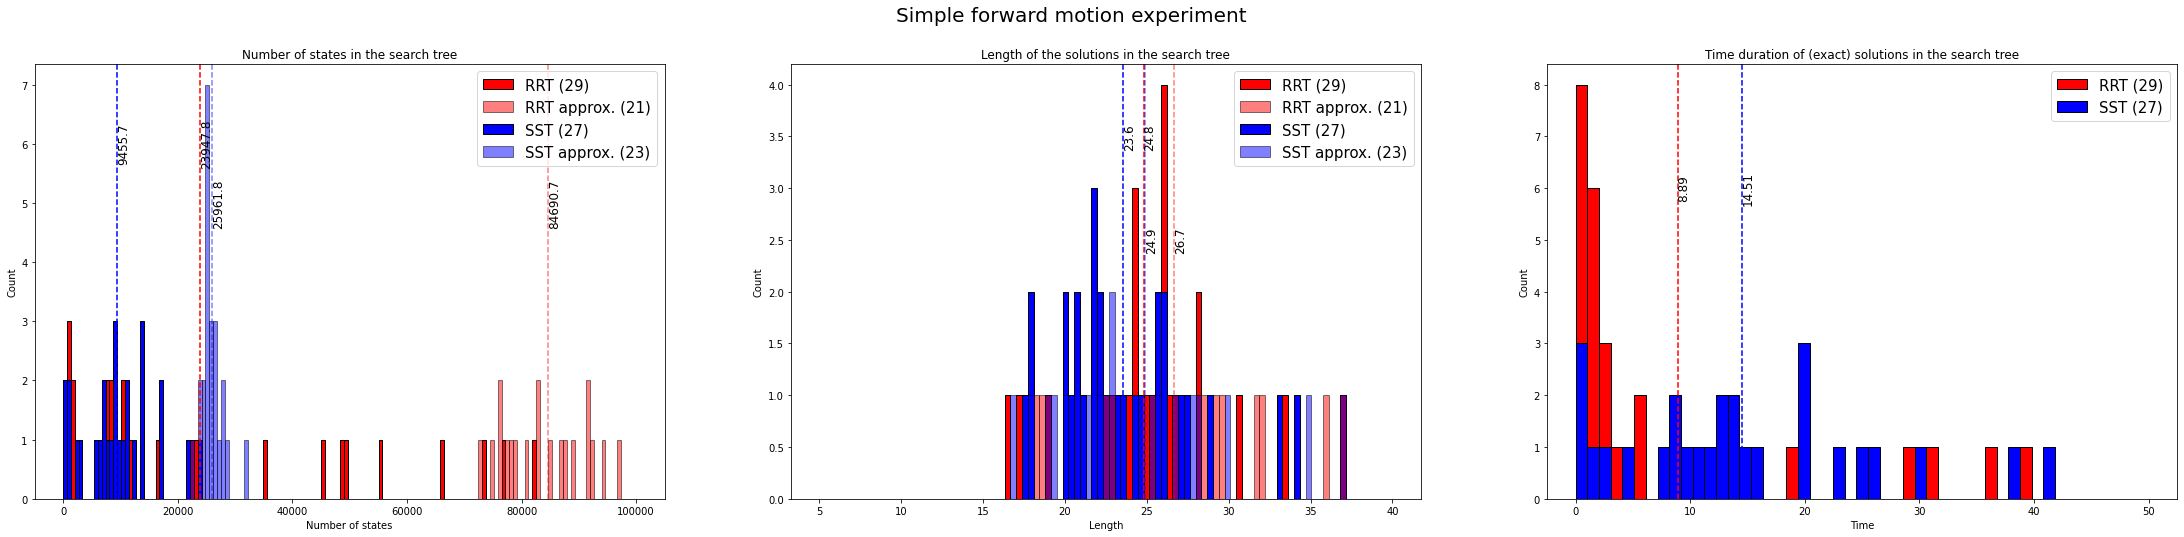

In [98]:
input_paths = ['solution_forward_rrt.log', 'solution_forward_sst.log']
labels = ['RRT', 'SST']

data = dict()
for i in range(len(input_paths)):
    data[labels[i]] = collect_log(input_paths[i])

bins = np.linspace(0, 100000, 150)
colors = ['red', 'blue', 'green']
c = 0
fig = plt.figure(figsize=(12*3.2, 8))
plt.subplot(131)
for k in data.keys():
    num_states_exact = data.get(k)[0]
    num_states_approx = data.get(k)[1]
    plt.hist(num_states_exact, bins=bins, color=colors[c], label=k+' ({})'.format(len(num_states_exact)), ec='black')
    plt.hist(num_states_approx, bins=bins, color=colors[c], alpha=0.5, label=k+' approx. ({})'.format(len(num_states_approx)), ec='black')
    
    mean_exact = sum(num_states_exact)/len(num_states_exact)
    mean_approx = sum(num_states_approx)/len(num_states_approx)
    plt.axvline(x=mean_exact, color=colors[c], linestyle='--')
    plt.text(mean_exact, 6, s='%3.1f'%(mean_exact), fontsize=12, rotation=90, verticalalignment='center')
    plt.axvline(x=mean_approx, color=colors[c], linestyle='--', alpha=0.5)
    plt.text(mean_approx, 5, s='%3.1f'%(mean_approx), fontsize=12, rotation=90, verticalalignment='center')
    c += 1

plt.legend(loc='upper right', fontsize=15)
plt.title('Number of states in the search tree')
plt.xlabel('Number of states')
plt.ylabel('Count')

bins = np.linspace(5, 40, 100)
c = 0
plt.subplot(132)
for k in data.keys():
    lengths_exact = data.get(k)[2]
    lengths_approx = data.get(k)[3]
    plt.hist(lengths_exact, bins=bins, color=colors[c], label=k+' ({})'.format(len(lengths_exact)), ec='black')
    plt.hist(lengths_approx, bins=bins, color=colors[c], alpha=0.5, label=k+' approx. ({})'.format(len(lengths_approx)), ec='black')
    
    mean_exact = sum(lengths_exact)/len(lengths_exact)
    mean_approx = sum(lengths_approx)/len(lengths_approx)
    plt.axvline(x=mean_exact, color=colors[c], linestyle='--')
    plt.text(mean_exact, 3.5, s='%3.1f'%(mean_exact), fontsize=12, rotation=90, verticalalignment='center')
    plt.axvline(x=mean_approx, color=colors[c], linestyle='--', alpha=0.5)
    plt.text(mean_approx, 2.5, s='%3.1f'%(mean_approx), fontsize=12, rotation=90, verticalalignment='center')
    c += 1

plt.legend(loc='upper right', fontsize=15)
plt.title('Length of the solutions in the search tree')
plt.xlabel('Length')
plt.ylabel('Count')

bins = np.linspace(0, 50, 50)
c = 0
plt.subplot(133)
for k in data.keys():
    times = data.get(k)[4]
    plt.hist(times, bins=bins, color=colors[c], label=k+' ({})'.format(len(times)), ec='black')
    
    mean_exact = sum(times)/len(times)
    plt.axvline(x=mean_exact, color=colors[c], linestyle='--')
    plt.text(mean_exact, 6, s='%3.2f'%(mean_exact), fontsize=12, rotation=90, verticalalignment='center')
    c += 1

plt.legend(loc='upper right', fontsize=15)
plt.title('Time duration of (exact) solutions in the search tree')
plt.xlabel('Time')
plt.ylabel('Count')

fig.suptitle('Simple forward motion experiment', fontsize=20)
plt.savefig('forward_stats.png')
plt.show()

## Experiment 2: Simple backward motion

100%|██████████| 50/50 [00:00<00:00, 147479.04it/s]


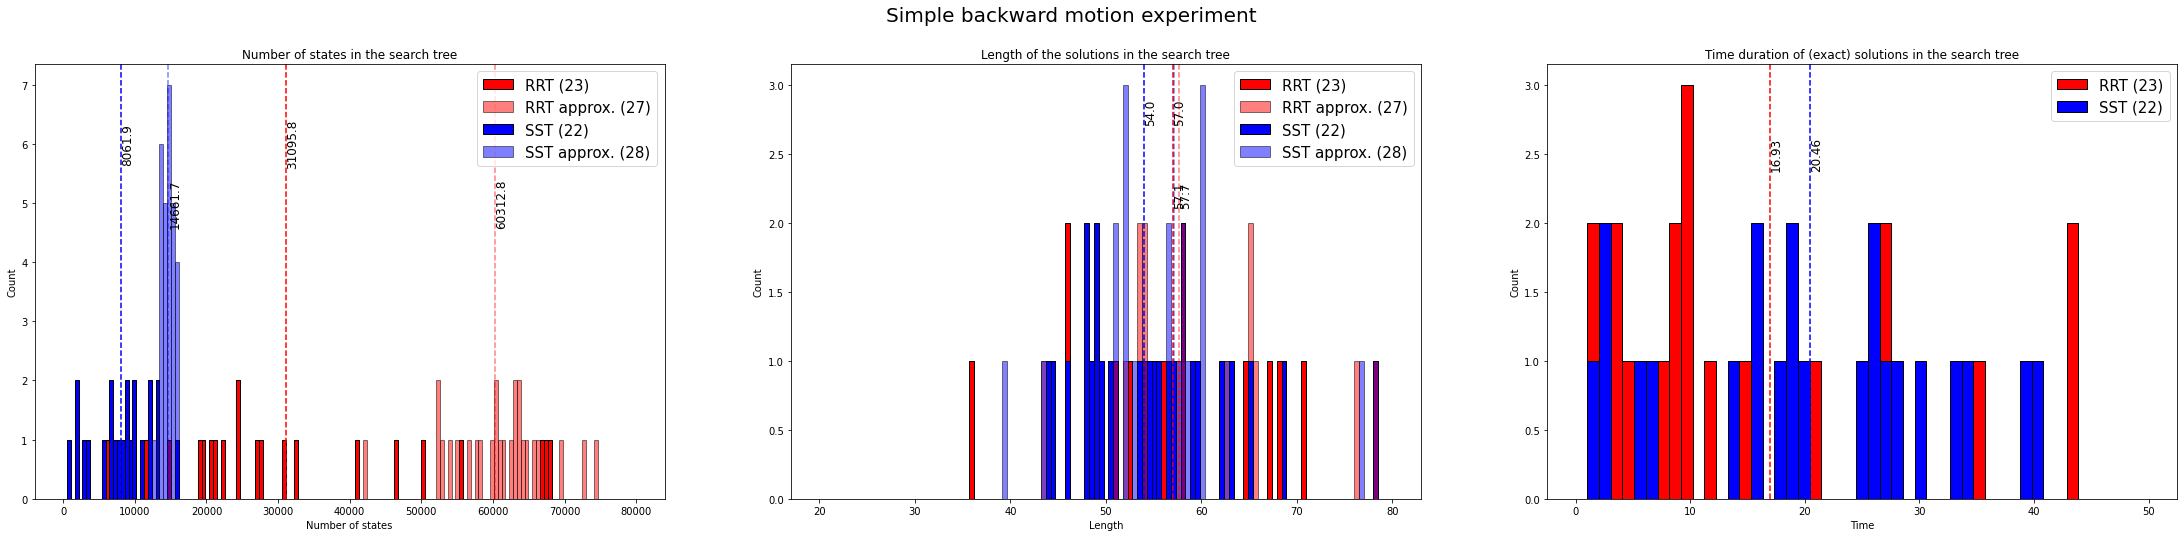

In [99]:
input_paths = ['solution_backward_rrt.log', 'solution_backward_sst.log']
labels = ['RRT', 'SST']

data = dict()
for i in range(len(input_paths)):
    data[labels[i]] = collect_log(input_paths[i])

bins = np.linspace(0, 80000, 150)
colors = ['red', 'blue', 'green']
c = 0
fig = plt.figure(figsize=(12*3.2, 8))
plt.subplot(131)
for k in data.keys():
    num_states_exact = data.get(k)[0]
    num_states_approx = data.get(k)[1]
    plt.hist(num_states_exact, bins=bins, color=colors[c], label=k+' ({})'.format(len(num_states_exact)), ec='black')
    plt.hist(num_states_approx, bins=bins, color=colors[c], alpha=0.5, label=k+' approx. ({})'.format(len(num_states_approx)), ec='black')
    
    mean_exact = sum(num_states_exact)/len(num_states_exact)
    mean_approx = sum(num_states_approx)/len(num_states_approx)
    plt.axvline(x=mean_exact, color=colors[c], linestyle='--')
    plt.text(mean_exact, 6, s='%3.1f'%(mean_exact), fontsize=12, rotation=90, verticalalignment='center')
    plt.axvline(x=mean_approx, color=colors[c], linestyle='--', alpha=0.5)
    plt.text(mean_approx, 5, s='%3.1f'%(mean_approx), fontsize=12, rotation=90, verticalalignment='center')
    c += 1

plt.legend(loc='upper right', fontsize=15)
plt.title('Number of states in the search tree')
plt.xlabel('Number of states')
plt.ylabel('Count')

bins = np.linspace(20, 80, 120)
c = 0
plt.subplot(132)
for k in data.keys():
    lengths_exact = data.get(k)[2]
    lengths_approx = data.get(k)[3]
    plt.hist(lengths_exact, bins=bins, color=colors[c], label=k+' ({})'.format(len(lengths_exact)), ec='black')
    plt.hist(lengths_approx, bins=bins, color=colors[c], alpha=0.5, label=k+' approx. ({})'.format(len(lengths_approx)), ec='black')
    
    mean_exact = sum(lengths_exact)/len(lengths_exact)
    mean_approx = sum(lengths_approx)/len(lengths_approx)
    plt.axvline(x=mean_exact, color=colors[c], linestyle='--')
    plt.text(mean_exact, 2.8, s='%3.1f'%(mean_exact), fontsize=12, rotation=90, verticalalignment='center')
    plt.axvline(x=mean_approx, color=colors[c], linestyle='--', alpha=0.5)
    plt.text(mean_approx, 2.2, s='%3.1f'%(mean_approx), fontsize=12, rotation=90, verticalalignment='center')
    c += 1

plt.legend(loc='upper right', fontsize=15)
plt.title('Length of the solutions in the search tree')
plt.xlabel('Length')
plt.ylabel('Count')

bins = np.linspace(0, 50, 50)
c = 0
plt.subplot(133)
for k in data.keys():
    times = data.get(k)[4]
    plt.hist(times, bins=bins, color=colors[c], label=k+' ({})'.format(len(times)), ec='black')
    
    mean_exact = sum(times)/len(times)
    plt.axvline(x=mean_exact, color=colors[c], linestyle='--')
    plt.text(mean_exact, 2.5, s='%3.2f'%(mean_exact), fontsize=12, rotation=90, verticalalignment='center')
    c += 1

plt.legend(loc='upper right', fontsize=15)
plt.title('Time duration of (exact) solutions in the search tree')
plt.xlabel('Time')
plt.ylabel('Count')

fig.suptitle('Simple backward motion experiment', fontsize=20)
plt.savefig('backward_stats.png')
plt.show()

100%|██████████| 470/470 [00:00<00:00, 305111.11it/s]


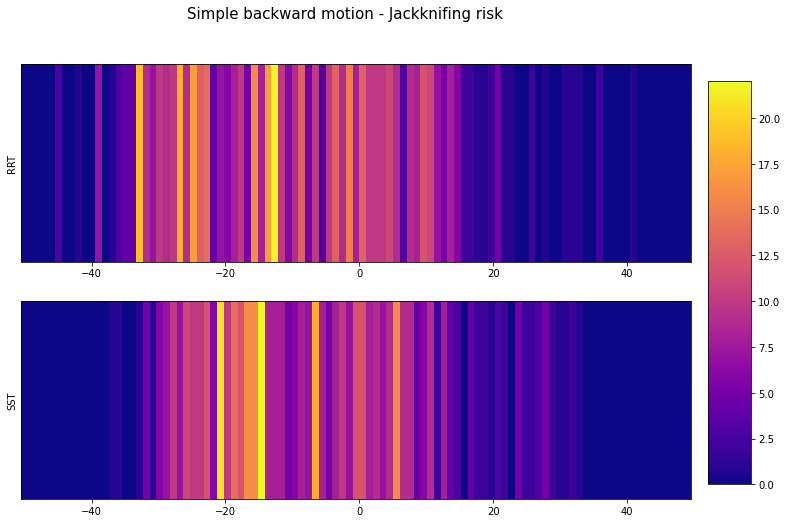

In [90]:
input_paths = ['solution_backward_rrt.txt', 'solution_backward_sst.txt']
labels = ['RRT', 'SST']

data = dict()
for i in range(len(input_paths)):
    data[labels[i]] = collect_txt(input_paths[i])

x = np.linspace(-50, 50)

fig, (ax,ax2) = plt.subplots(nrows=2, sharex=False, figsize=(12,8))

bins = np.linspace(-50, 50, 100)
hist = np.histogram(data['RRT'], bins=bins)
x = hist[1][:-1]
y = hist[0]
extent = [x[0]-(x[1]-x[0])/2., x[-1]+(x[1]-x[0])/2.,0,1]
im = ax.imshow(y[np.newaxis,:], cmap="plasma", aspect="auto", extent=extent)
ax.set_yticks([])
ax.set_ylabel('RRT')
ax.set_xlim(extent[0], extent[1])

hist = np.histogram(data['SST'], bins=bins)
x = hist[1][:-1]
y = hist[0]
extent = [x[0]-(x[1]-x[0])/2., x[-1]+(x[1]-x[0])/2.,0,1]
ax2.imshow(y[np.newaxis,:], cmap="plasma", aspect="auto", extent=extent)
ax2.set_yticks([])
ax2.set_ylabel('SST')
ax2.set_xlim(extent[0], extent[1])

cbar_ax = fig.add_axes([0.92, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)
plt.suptitle('Simple backward motion - Jackknifing risk', fontsize=15)
plt.savefig('backward_psi.png')
plt.show()

## Experiment 3: Circular obstacles avoidance

100%|██████████| 50/50 [00:00<00:00, 111491.33it/s]


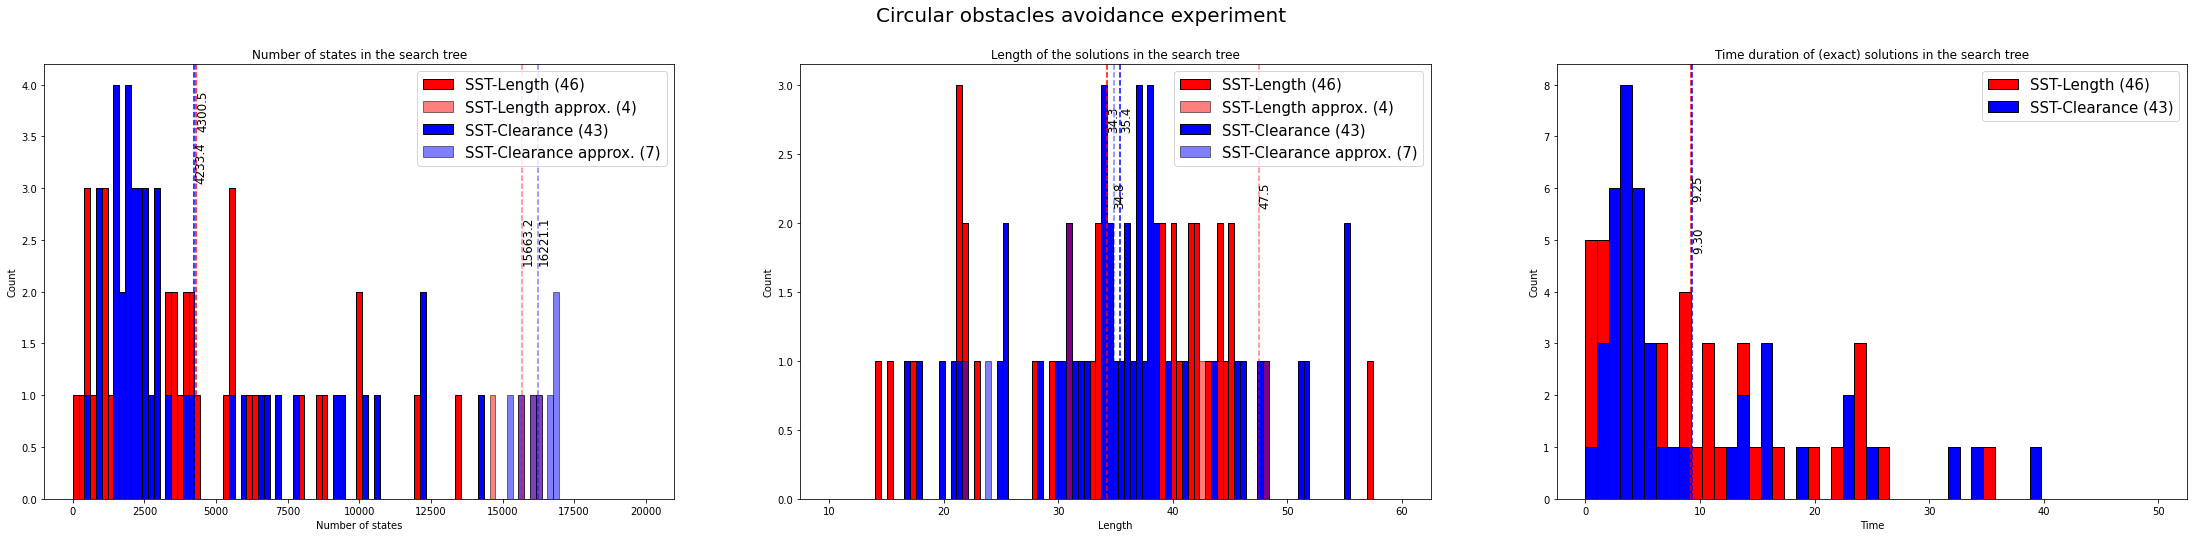

In [104]:
input_paths = ['solution_obstacles_sst_length.log', 'solution_obstacles_sst_clearance.log']
labels = ['SST-Length', 'SST-Clearance']

data = dict()
for i in range(len(input_paths)):
    data[labels[i]] = collect_log(input_paths[i])

bins = np.linspace(0, 20000, 100)
colors = ['red', 'blue', 'green']
c = 0
fig = plt.figure(figsize=(12*3.2, 8))
plt.subplot(131)
for k in data.keys():
    num_states_exact = data.get(k)[0]
    num_states_approx = data.get(k)[1]
    plt.hist(num_states_exact, bins=bins, color=colors[c], label=k+' ({})'.format(len(num_states_exact)), ec='black')
    plt.hist(num_states_approx, bins=bins, color=colors[c], alpha=0.5, label=k+' approx. ({})'.format(len(num_states_approx)), ec='black')
    
    mean_exact = sum(num_states_exact)/len(num_states_exact)
    mean_approx = sum(num_states_approx)/len(num_states_approx)
    plt.axvline(x=mean_exact, color=colors[c], linestyle='--')
    plt.text(mean_exact, 3.75 if c==0 else 3.25, s='%3.1f'%(mean_exact), fontsize=12, rotation=90, verticalalignment='center')
    plt.axvline(x=mean_approx, color=colors[c], linestyle='--', alpha=0.5)
    plt.text(mean_approx, 2.5, s='%3.1f'%(mean_approx), fontsize=12, rotation=90, verticalalignment='center')
    c += 1

plt.legend(loc='upper right', fontsize=15)
plt.title('Number of states in the search tree')
plt.xlabel('Number of states')
plt.ylabel('Count')

bins = np.linspace(10, 60, 100)
c = 0
plt.subplot(132)
for k in data.keys():
    lengths_exact = data.get(k)[2]
    lengths_approx = data.get(k)[3]
    plt.hist(lengths_exact, bins=bins, color=colors[c], label=k+' ({})'.format(len(lengths_exact)), ec='black')
    plt.hist(lengths_approx, bins=bins, color=colors[c], alpha=0.5, label=k+' approx. ({})'.format(len(lengths_approx)), ec='black')
    
    mean_exact = sum(lengths_exact)/len(lengths_exact)
    mean_approx = sum(lengths_approx)/len(lengths_approx)
    plt.axvline(x=mean_exact, color=colors[c], linestyle='--')
    plt.text(mean_exact, 2.75, s='%3.1f'%(mean_exact), fontsize=12, rotation=90, verticalalignment='center')
    plt.axvline(x=mean_approx, color=colors[c], linestyle='--', alpha=0.5)
    plt.text(mean_approx, 2.2, s='%3.1f'%(mean_approx), fontsize=12, rotation=90, verticalalignment='center')
    c += 1

plt.legend(loc='upper right', fontsize=15)
plt.title('Length of the solutions in the search tree')
plt.xlabel('Length')
plt.ylabel('Count')

bins = np.linspace(0, 50, 50)
c = 0
plt.subplot(133)
for k in data.keys():
    times = data.get(k)[4]
    plt.hist(times, bins=bins, color=colors[c], label=k+' ({})'.format(len(times)), ec='black')
    
    mean_exact = sum(times)/len(times)
    plt.axvline(x=mean_exact, color=colors[c], linestyle='--')
    plt.text(mean_exact, 6 if c== 0 else 5, s='%3.2f'%(mean_exact), fontsize=12, rotation=90, verticalalignment='center')
    c += 1

plt.legend(loc='upper right', fontsize=15)
plt.title('Time duration of (exact) solutions in the search tree')
plt.xlabel('Time')
plt.ylabel('Count')

fig.suptitle('Circular obstacles avoidance experiment', fontsize=20)
plt.savefig('obstacles_stats.png')
plt.show()

## Experiment 4: Three point turn

100%|██████████| 50/50 [00:00<00:00, 125203.10it/s]


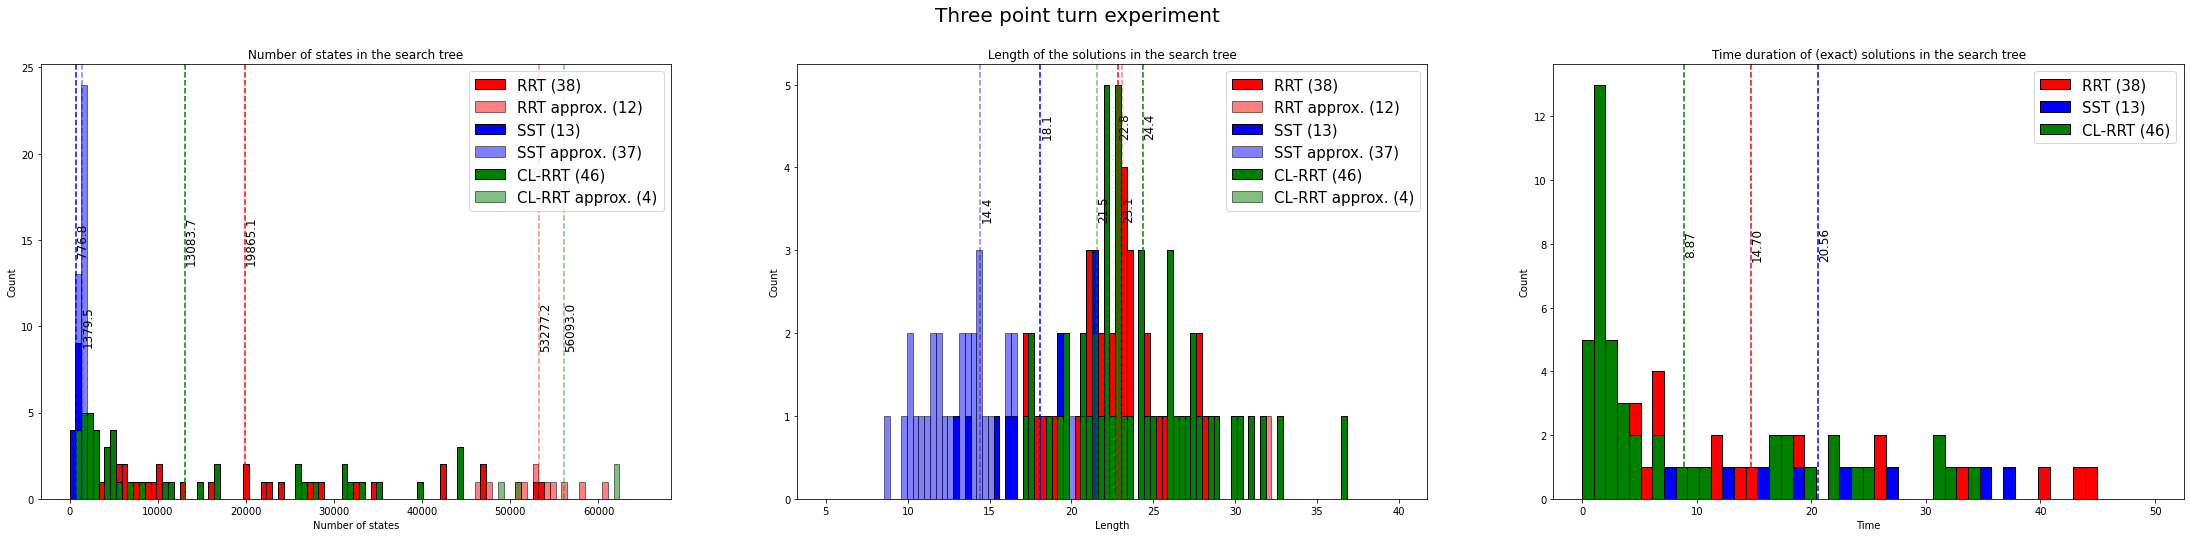

In [101]:
input_paths = ['solution_turn_rrt.log', 'solution_turn_sst.log', 'solution_turn_clrrt.log']
labels = ['RRT', 'SST', 'CL-RRT']

data = dict()
for i in range(len(input_paths)):
    data[labels[i]] = collect_log(input_paths[i])

bins = np.linspace(0, 65000, 100)
colors = ['red', 'blue', 'green']
c = 0
fig = plt.figure(figsize=(12*3.2, 8))
plt.subplot(131)
for k in data.keys():
    num_states_exact = data.get(k)[0]
    num_states_approx = data.get(k)[1]
    plt.hist(num_states_exact, bins=bins, color=colors[c], label=k+' ({})'.format(len(num_states_exact)), ec='black')
    plt.hist(num_states_approx, bins=bins, color=colors[c], alpha=0.5, label=k+' approx. ({})'.format(len(num_states_approx)), ec='black')
    
    mean_exact = sum(num_states_exact)/len(num_states_exact)
    mean_approx = sum(num_states_approx)/len(num_states_approx)
    plt.axvline(x=mean_exact, color=colors[c], linestyle='--')
    plt.text(mean_exact, 15, s='%3.1f'%(mean_exact), fontsize=12, rotation=90, verticalalignment='center')
    plt.axvline(x=mean_approx, color=colors[c], linestyle='--', alpha=0.5)
    plt.text(mean_approx, 10, s='%3.1f'%(mean_approx), fontsize=12, rotation=90, verticalalignment='center')
    c += 1

plt.legend(loc='upper right', fontsize=15)
plt.title('Number of states in the search tree')
plt.xlabel('Number of states')
plt.ylabel('Count')

bins = np.linspace(5, 40, 100)
c = 0
plt.subplot(132)
for k in data.keys():
    lengths_exact = data.get(k)[2]
    lengths_approx = data.get(k)[3]
    plt.hist(lengths_exact, bins=bins, color=colors[c], label=k+' ({})'.format(len(lengths_exact)), ec='black')
    plt.hist(lengths_approx, bins=bins, color=colors[c], alpha=0.5, label=k+' approx. ({})'.format(len(lengths_approx)), ec='black')
    
    mean_exact = sum(lengths_exact)/len(lengths_exact)
    mean_approx = sum(lengths_approx)/len(lengths_approx)
    plt.axvline(x=mean_exact, color=colors[c], linestyle='--')
    plt.text(mean_exact, 4.5, s='%3.1f'%(mean_exact), fontsize=12, rotation=90, verticalalignment='center')
    plt.axvline(x=mean_approx, color=colors[c], linestyle='--', alpha=0.5)
    plt.text(mean_approx, 3.5, s='%3.1f'%(mean_approx), fontsize=12, rotation=90, verticalalignment='center')
    c += 1

plt.legend(loc='upper right', fontsize=15)
plt.title('Length of the solutions in the search tree')
plt.xlabel('Length')
plt.ylabel('Count')

bins = np.linspace(0, 50, 50)
c = 0
plt.subplot(133)
for k in data.keys():
    times = data.get(k)[4]
    plt.hist(times, bins=bins, color=colors[c], label=k+' ({})'.format(len(times)), ec='black')
    
    mean_exact = sum(times)/len(times)
    plt.axvline(x=mean_exact, color=colors[c], linestyle='--')
    plt.text(mean_exact, 8, s='%3.2f'%(mean_exact), fontsize=12, rotation=90, verticalalignment='center')
    c += 1

plt.legend(loc='upper right', fontsize=15)
plt.title('Time duration of (exact) solutions in the search tree')
plt.xlabel('Time')
plt.ylabel('Count')

fig.suptitle('Three point turn experiment', fontsize=20)
plt.savefig('turn_stats.png')
plt.show()

100%|██████████| 150/150 [00:00<00:00, 150405.36it/s]


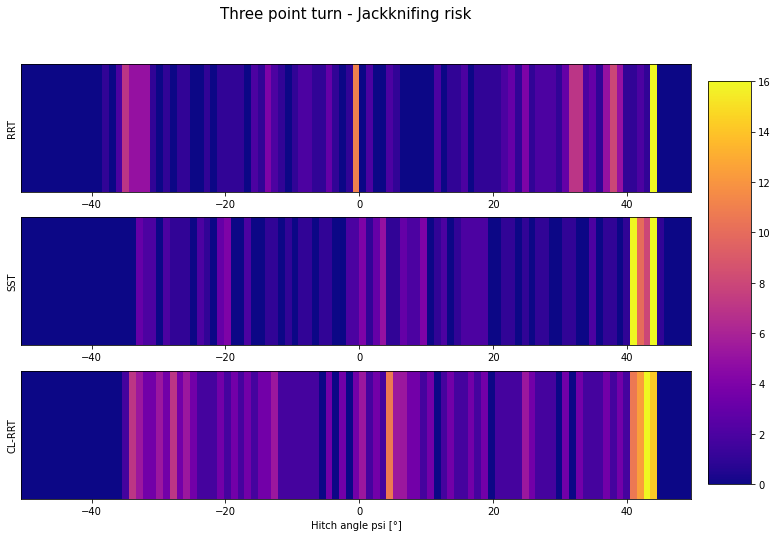

In [92]:
input_paths = ['solution_turn_rrt.txt', 'solution_turn_sst.txt', 'solution_turn_clrrt.txt']
labels = ['RRT', 'SST', 'CL-RRT']

data = dict()
for i in range(len(input_paths)):
    data[labels[i]] = collect_txt(input_paths[i])

x = np.linspace(-50, 50)

fig, (ax,ax2,ax3) = plt.subplots(nrows=3, sharex=False, figsize=(12,8))

bins = np.linspace(-50, 50, 100)
hist = np.histogram(data['RRT'], bins=bins)
x = hist[1][:-1]
y = hist[0]
extent = [x[0]-(x[1]-x[0])/2., x[-1]+(x[1]-x[0])/2.,0,1]
im = ax.imshow(y[np.newaxis,:], cmap="plasma", aspect="auto", extent=extent)
ax.set_yticks([])
ax.set_ylabel('RRT')
ax.set_xlim(extent[0], extent[1])

hist = np.histogram(data['SST'], bins=bins)
x = hist[1][:-1]
y = hist[0]
extent = [x[0]-(x[1]-x[0])/2., x[-1]+(x[1]-x[0])/2.,0,1]
ax2.imshow(y[np.newaxis,:], cmap="plasma", aspect="auto", extent=extent)
ax2.set_yticks([])
ax2.set_ylabel('SST')
ax2.set_xlim(extent[0], extent[1])

hist = np.histogram(data['CL-RRT'], bins=bins)
x = hist[1][:-1]
y = hist[0]
extent = [x[0]-(x[1]-x[0])/2., x[-1]+(x[1]-x[0])/2.,0,1]
ax3.imshow(y[np.newaxis,:], cmap="plasma", aspect="auto", extent=extent)
ax3.set_yticks([])
ax3.set_ylabel('CL-RRT')
ax3.set_xlim(extent[0], extent[1])
ax3.set_xlabel('Hitch angle psi [°]')

cbar_ax = fig.add_axes([0.92, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)
plt.suptitle('Three point turn - Jackknifing risk', fontsize=15)
plt.savefig('turn_psi.png')
plt.show()

## Experiment 5: Real parking

100%|██████████| 50/50 [00:00<00:00, 137608.40it/s]


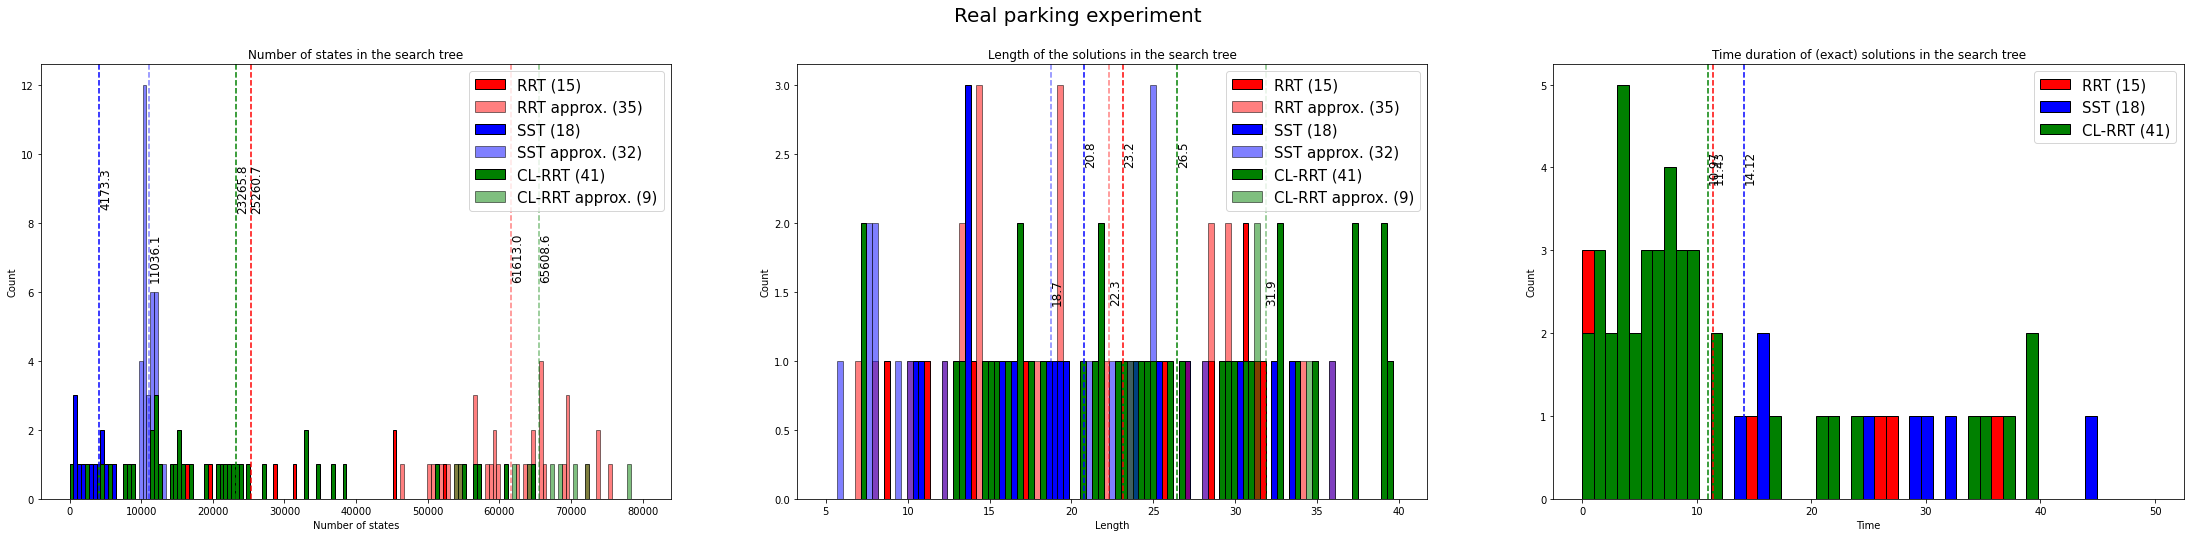

In [108]:
input_paths = ['solution_real_rrt.log', 'solution_real_sst.log', 'solution_real_clrrt.log']
labels = ['RRT', 'SST', 'CL-RRT']

data = dict()
for i in range(len(input_paths)):
    data[labels[i]] = collect_log(input_paths[i])

bins = np.linspace(0, 80000, 150)
colors = ['red', 'blue', 'green']
c = 0
fig = plt.figure(figsize=(12*3.2, 8))
plt.subplot(131)
for k in data.keys():
    num_states_exact = data.get(k)[0]
    num_states_approx = data.get(k)[1]
    plt.hist(num_states_exact, bins=bins, color=colors[c], label=k+' ({})'.format(len(num_states_exact)), ec='black')
    plt.hist(num_states_approx, bins=bins, color=colors[c], alpha=0.5, label=k+' approx. ({})'.format(len(num_states_approx)), ec='black')
    
    mean_exact = sum(num_states_exact)/len(num_states_exact)
    mean_approx = sum(num_states_approx)/len(num_states_approx)
    plt.axvline(x=mean_exact, color=colors[c], linestyle='--')
    plt.text(mean_exact, 9, s='%3.1f'%(mean_exact), fontsize=12, rotation=90, verticalalignment='center')
    plt.axvline(x=mean_approx, color=colors[c], linestyle='--', alpha=0.5)
    plt.text(mean_approx, 7, s='%3.1f'%(mean_approx), fontsize=12, rotation=90, verticalalignment='center')
    c += 1

plt.legend(loc='upper right', fontsize=15)
plt.title('Number of states in the search tree')
plt.xlabel('Number of states')
plt.ylabel('Count')

bins = np.linspace(5, 40, 100)
c = 0
plt.subplot(132)
for k in data.keys():
    lengths_exact = data.get(k)[2]
    lengths_approx = data.get(k)[3]
    plt.hist(lengths_exact, bins=bins, color=colors[c], label=k+' ({})'.format(len(lengths_exact)), ec='black')
    plt.hist(lengths_approx, bins=bins, color=colors[c], alpha=0.5, label=k+' approx. ({})'.format(len(lengths_approx)), ec='black')
    
    mean_exact = sum(lengths_exact)/len(lengths_exact)
    mean_approx = sum(lengths_approx)/len(lengths_approx)
    plt.axvline(x=mean_exact, color=colors[c], linestyle='--')
    plt.text(mean_exact, 2.5, s='%3.1f'%(mean_exact), fontsize=12, rotation=90, verticalalignment='center')
    plt.axvline(x=mean_approx, color=colors[c], linestyle='--', alpha=0.5)
    plt.text(mean_approx, 1.5, s='%3.1f'%(mean_approx), fontsize=12, rotation=90, verticalalignment='center')
    c += 1

plt.legend(loc='upper right', fontsize=15)
plt.title('Length of the solutions in the search tree')
plt.xlabel('Length')
plt.ylabel('Count')

bins = np.linspace(0, 50, 50)
c = 0
plt.subplot(133)
for k in data.keys():
    times = data.get(k)[4]
    plt.hist(times, bins=bins, color=colors[c], label=k+' ({})'.format(len(times)), ec='black')
    
    mean_exact = sum(times)/len(times)
    plt.axvline(x=mean_exact, color=colors[c], linestyle='--')
    plt.text(mean_exact, 4, s='%3.2f'%(mean_exact), fontsize=12, rotation=90, verticalalignment='center')
    c += 1

plt.legend(loc='upper right', fontsize=15)
plt.title('Time duration of (exact) solutions in the search tree')
plt.xlabel('Time')
plt.ylabel('Count')

fig.suptitle('Real parking experiment', fontsize=20)
plt.savefig('real_stats.png')
plt.show()

100%|██████████| 95/95 [00:00<00:00, 252829.24it/s]


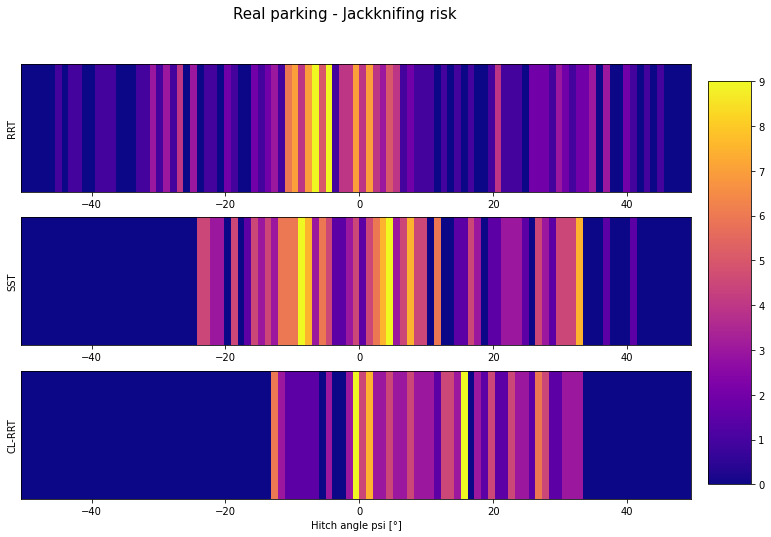

In [109]:
input_paths = ['solution_real_rrt.txt', 'solution_real_sst.txt', 'solution_real_clrrt.txt']
labels = ['RRT', 'SST', 'CL-RRT']

data = dict()
for i in range(len(input_paths)):
    data[labels[i]] = collect_txt(input_paths[i])

x = np.linspace(-50, 50)

fig, (ax,ax2,ax3) = plt.subplots(nrows=3, sharex=False, figsize=(12,8))

bins = np.linspace(-50, 50, 100)
hist = np.histogram(data['RRT'], bins=bins)
x = hist[1][:-1]
y = hist[0]
extent = [x[0]-(x[1]-x[0])/2., x[-1]+(x[1]-x[0])/2.,0,1]
im = ax.imshow(y[np.newaxis,:], cmap="plasma", aspect="auto", extent=extent)
ax.set_yticks([])
ax.set_ylabel('RRT')
ax.set_xlim(extent[0], extent[1])

hist = np.histogram(data['SST'], bins=bins)
x = hist[1][:-1]
y = hist[0]
extent = [x[0]-(x[1]-x[0])/2., x[-1]+(x[1]-x[0])/2.,0,1]
ax2.imshow(y[np.newaxis,:], cmap="plasma", aspect="auto", extent=extent)
ax2.set_yticks([])
ax2.set_ylabel('SST')
ax2.set_xlim(extent[0], extent[1])

hist = np.histogram(data['CL-RRT'], bins=bins)
x = hist[1][:-1]
y = hist[0]
extent = [x[0]-(x[1]-x[0])/2., x[-1]+(x[1]-x[0])/2.,0,1]
ax3.imshow(y[np.newaxis,:], cmap="plasma", aspect="auto", extent=extent)
ax3.set_yticks([])
ax3.set_ylabel('CL-RRT')
ax3.set_xlim(extent[0], extent[1])
ax3.set_xlabel('Hitch angle psi [°]')

cbar_ax = fig.add_axes([0.92, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)
plt.suptitle('Real parking - Jackknifing risk', fontsize=15)
plt.savefig('real_psi.png')
plt.show()